In [1]:
# Step 1: first we will Check whether CUDA (GPU) is available on our machine or not.
# If CUDA is available, computations will be faster on GPU.
import torch

# now we will Check CUDA availability (True means GPU is ready to use)
torch.cuda.is_available()

True

In [2]:
# Step 2: now we will Install PyTorch and related packages.
# --index-url points to CUDA 12.1 compatible builds.
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# and we will Install diffusers (for Stable Diffusion), transformers (for tokenizing prompts), and accelerate (for speed improvements)
!pip install diffusers==0.25.0 transformers accelerate

# matplotlib for displaying images inside notebook or script
!pip install matplotlib


Looking in indexes: https://download.pytorch.org/whl/cu121


In [3]:
# Step 3:Now we will Make sure diffusers, transformers, and accelerate are updated to their latest versions
!pip install --upgrade diffusers transformers accelerate

# Upgrade huggingface_hub for authentication & model download support
!pip install --upgrade huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 29.1 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.25.0
    Uninstalling diffusers-0.25.0:
      Successfully uninstalled diffusers-0.25.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.3.0
    Uninstalling accelerate-1.3.0:
      Successfully uninstalled accelerate-1.3.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub

In [6]:
# Step 4: No we will Import all required libraries/modules for our task
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
from datetime import datetime
import os


In [7]:
# Step 5: Now Set the model which we want to use from Hugging Face Hub
# We're using Stable Diffusion v1.5 by RunwayML
model_id = "runwayml/stable-diffusion-v1-5"

# Load the pipeline for text-to-image generation and
# we will Use float16 for faster and optimized performance
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16  # Use float16 for GPU (efficient)
)

# now we will Move the model to GPU which we have available, otherwise run it on CPU (running slower)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter your prompt for the image: A futuristic city skyline at night


  0%|          | 0/50 [00:00<?, ?it/s]

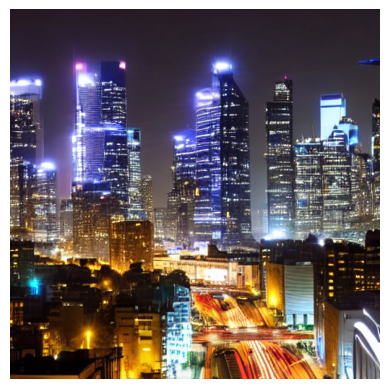

In [8]:
# Step 6: Now we will create the prompt for user to get image
user_prompt = input("Enter your prompt for the image: ")

# we will also Define a negative prompt (undesirable features which we want to avoid)
negative_prompt = "blurry, low quality, deformed"

# Set other generation parameters
guidance_scale = 8.0               # How strongly the model follows our prompt (higher = more precise but normal if 7 to 9)
num_inference_steps = 50           # Number of diffusion steps (more steps = better quality but slower good range is 50 to 80)
height, width = 512, 512           # Image resolution (512x512 is recommended for SD v1.5)

# Generate the image based on user prompt
result = pipe(
    prompt=user_prompt,            # User custom text prompt
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width
)

# Now we will extract the generated image and
generated_image = result.images[0]

# we will Display the image using matplotlib
plt.imshow(generated_image)
plt.axis('off')  # we will Hide the axis for cleaner view
plt.show()


Enter your prompt for the image: A aeroplane fly obove the water


  0%|          | 0/50 [00:00<?, ?it/s]

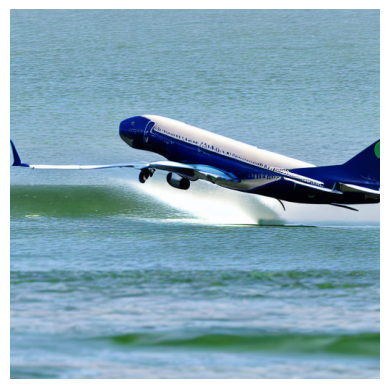

In [9]:
# Step 6: Now we will create the prompt for user to get image
user_prompt = input("Enter your prompt for the image: ")

# we will also Define a negative prompt (undesirable features which we want to avoid)
negative_prompt = "blurry, low quality, deformed"

# Set other generation parameters
guidance_scale = 8.0               # How strongly the model follows our prompt (higher = more precise but normal if 7 to 9)
num_inference_steps = 50           # Number of diffusion steps (more steps = better quality but slower good range is 50 to 80)
height, width = 512, 512           # Image resolution (512x512 is recommended for SD v1.5)

# Generate the image based on user prompt
result = pipe(
    prompt=user_prompt,            # User custom text prompt
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width
)

# Now we will extract the generated image and
generated_image = result.images[0]

# we will Display the image using matplotlib
plt.imshow(generated_image)
plt.axis('off')  # we will Hide the axis for cleaner view
plt.show()



Enter your prompt for the image: A beautiful scenary background


  0%|          | 0/50 [00:00<?, ?it/s]

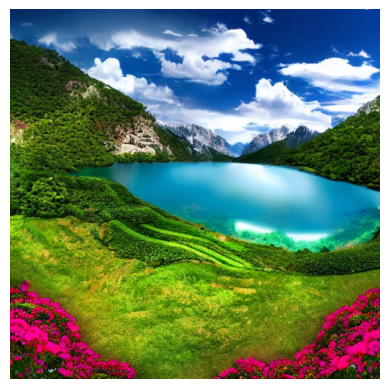

In [10]:
# Step 6: Now we will create the prompt for user to get image
user_prompt = input("Enter your prompt for the image: ")

# we will also Define a negative prompt (undesirable features which we want to avoid)
negative_prompt = "blurry, low quality, deformed"

# Set other generation parameters
guidance_scale = 8.0               # How strongly the model follows our prompt (higher = more precise but normal if 7 to 9)
num_inference_steps = 50           # Number of diffusion steps (more steps = better quality but slower good range is 50 to 80)
height, width = 512, 512           # Image resolution (512x512 is recommended for SD v1.5)

# Generate the image based on user prompt
result = pipe(
    prompt=user_prompt,            # User custom text prompt
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width
)

# Now we will extract the generated image and
generated_image = result.images[0]

# we will Display the image using matplotlib
plt.imshow(generated_image)
plt.axis('off')  # we will Hide the axis for cleaner view
plt.show()


Enter your prompt for the image: A cute anime girl with pink hair and blue eyes, wearing a school uniform


  0%|          | 0/50 [00:00<?, ?it/s]

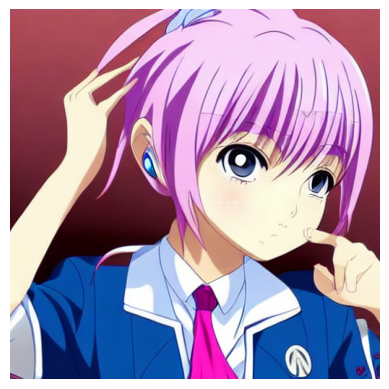

In [11]:

# Step 6: Now we will create the prompt for user to get image
user_prompt = input("Enter your prompt for the image: ")

# we will also Define a negative prompt (undesirable features which we want to avoid)
negative_prompt = "blurry, low quality, deformed"

# Set other generation parameters
guidance_scale = 8.0               # How strongly the model follows our prompt (higher = more precise but normal if 7 to 9)
num_inference_steps = 50           # Number of diffusion steps (more steps = better quality but slower good range is 50 to 80)
height, width = 512, 512           # Image resolution (512x512 is recommended for SD v1.5)

# Generate the image based on user prompt
result = pipe(
    prompt=user_prompt,            # User custom text prompt
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width
)

# Now we will extract the generated image and
generated_image = result.images[0]

# we will Display the image using matplotlib
plt.imshow(generated_image)
plt.axis('off')  # we will Hide the axis for cleaner view
plt.show()


Enter your prompt for the image: Astronaut riding a lion on Mars, concept art


  0%|          | 0/50 [00:00<?, ?it/s]

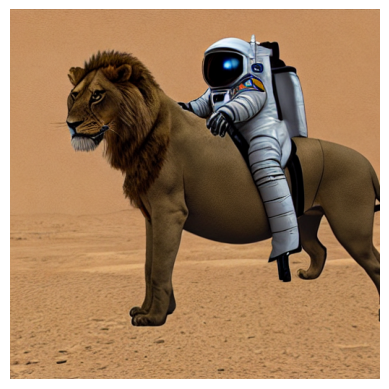

In [12]:


# Step 6: Now we will create the prompt for user to get image
user_prompt = input("Enter your prompt for the image: ")

# we will also Define a negative prompt (undesirable features which we want to avoid)
negative_prompt = "blurry, low quality, deformed"

# Set other generation parameters
guidance_scale = 8.0               # How strongly the model follows our prompt (higher = more precise but normal if 7 to 9)
num_inference_steps = 50           # Number of diffusion steps (more steps = better quality but slower good range is 50 to 80)
height, width = 512, 512           # Image resolution (512x512 is recommended for SD v1.5)

# Generate the image based on user prompt
result = pipe(
    prompt=user_prompt,            # User custom text prompt
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width
)

# Now we will extract the generated image and
generated_image = result.images[0]

# we will Display the image using matplotlib
plt.imshow(generated_image)
plt.axis('off')  # we will Hide the axis for cleaner view
plt.show()



Enter your prompt for the image: school kids walking with backpacks in a rural village, green fields and  traditional houses


  0%|          | 0/50 [00:00<?, ?it/s]

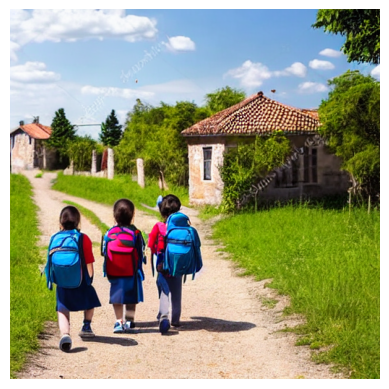

In [15]:
# Step 6: Now we will create the prompt for user to get image
user_prompt = input("Enter your prompt for the image: ")

# we will also Define a negative prompt (undesirable features which we want to avoid)
negative_prompt = "blurry, low quality, deformed"

# Set other generation parameters
guidance_scale = 8.0               # How strongly the model follows our prompt (higher = more precise but normal if 7 to 9)
num_inference_steps = 50           # Number of diffusion steps (more steps = better quality but slower good range is 50 to 80)
height, width = 512, 512           # Image resolution (512x512 is recommended for SD v1.5)

# Generate the image based on user prompt
result = pipe(
    prompt=user_prompt,            # User custom text prompt
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width
)

# Now we will extract the generated image and
generated_image = result.images[0]

# we will Display the image using matplotlib
plt.imshow(generated_image)
plt.axis('off')  # we will Hide the axis for cleaner view
plt.show()


